## Introduction to machine learning

## Task 1: Linear regression

### Linear Regression

Let's consider a dataset of $n$ observations with one independent variable $x$, and a dependent variable $y$. 

$$
\mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}, \quad \mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$


We can define a hypothesis function assuming a linear relation as;

$$
\hat{y}_{i} = f_\theta(x_i) = \theta_0 + \theta_1 x_i + \epsilon_i, \quad \quad i = 1, \dots , n
$$

or in matrix notation as:

$$ 
\mathbf{\hat{y}} = f_\theta(x) = \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\epsilon} 

where,

$$
\mathbf{\hat{y}} =
\begin{bmatrix}
\hat{y_1} \\
\hat{y_2} \\
\vdots \\
\hat{y_n}
\end{bmatrix} \quad

\mathbf{X} = 
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n\\
\end{bmatrix} \quad

\boldsymbol{\theta} =
\begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix} \quad

\boldsymbol{\epsilon} =
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2\\
\vdots \\
\epsilon_n
\end{bmatrix}
$$


We can then write the error as

$$
\boldsymbol{\epsilon} = \mathbf{\hat{y}} - \mathbf{X} \boldsymbol{\theta} =
\begin{bmatrix}
\hat{y_1} - \theta_0 - \theta_1 x_1\\
\hat{y_2} - \theta_0 - \theta_1 x_2\\
\vdots \\
\hat{y_n} - \theta_0 - \theta_1 x_n
\end{bmatrix} \quad
$$

Taking the euclidian norm of the error vector, we are left with a scalar representation of the error. 

$$
\|\mathbf{y} - \mathbf{Xw}\| = \sqrt{\sum_{i=1}^{N} (y_i - w_0 - w_1 x_i)^2}.
$$

Lets then take the square of it to ensure that a unique solution. 

$$
L(\boldsymbol{\theta}) = \|\mathbf{y} - \mathbf{Xw}\|^2 = \sum_{i=1}^{N} (y_i - w_0 - w_1 x_i)^2.
$$

Where $L(\boldsymbol{\theta})$ represents the loss/objective function, which is also the sum of squared errors (SSE), or residual sum of squares (RSS). 

From here it is only a mathematical problem to find the unique set of $\boldsymbol{\theta}$ that minimizes the defined loss function. Remember from calculus that to find the minimum value of a scalar function we need to calculate the gradient of it and then set it to zero. The gradient of the SSE is defined as,

$$
\nabla_{\boldsymbol{\theta}} L(\boldsymbol{\theta}) = 2\mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$

setting the gradient as zero results the linear equation

$$
\boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}

#### Example:

According to Terzaghi the relationship between void ratio and effective stress in soil consolidation can be described as:
$$
e = e_0 - C_c \log \sigma'
$$

where:  
- $e$ is the void ratio  
- $e_0$ is the initial void ratio  
- $C_c$ is the compression index  
- $\sigma'$ is the effective stress  


Lets create some syntetic data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
e0 = 1.2  # Initial void ratio
Cc = 0.3  # Compression index
sigma_prime = np.linspace(1, 100, 20)  # Effective stress from 0.1 to 100 (linear scale)
noise = np.random.normal(0, 0.05, len(sigma_prime))  # Normal distribuion noise

# Compute void ratio with noise
e = e0 - Cc * np.log10(sigma_prime) + noise

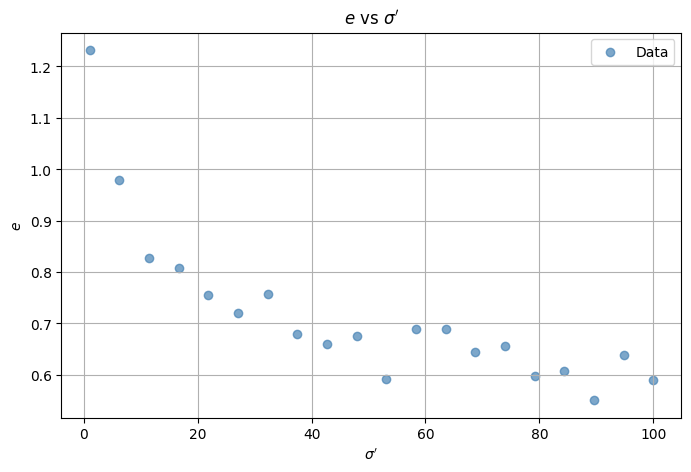

In [136]:
# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(sigma_prime, e, label="Data", color="steelblue", alpha=0.7)
plt.xlabel(r'$\sigma^\prime$')
plt.ylabel(r'$e$')
plt.title(r'$e$ vs $\sigma^\prime$')
plt.legend()
plt.grid(True)
plt.show()

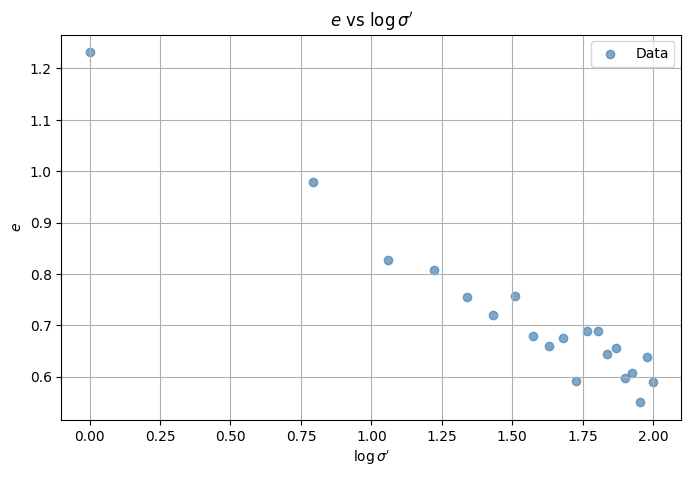

In [137]:
# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(np.log10(sigma_prime), e, label="Data", color="steelblue", alpha=0.7)
plt.xlabel(r'$\log \sigma^\prime$')
plt.ylabel(r'$e$')
plt.title(r'$e$ vs $\log \sigma^\prime$')
plt.legend()
plt.grid(True)
plt.show()

We can clearly see that the relation between the $\log \sigma'$ and $e$ seems linear. Lets now try to find the the best fit line. 

#### 1.a Mathematical approach

In [139]:
X = np.hstack((np.ones((len(sigma_prime), 1)), np.log10(sigma_prime).reshape(-1, 1))) # Stack ones and log(sigma) to form the matrix X
y = e.reshape(-1, 1)  # Reshape e to a column vector
theta_best = np.linalg.inv(X.T @ X) @ X.T @ y # numpy.linalg.inv() to compute the inverse of a matrix

print(f'regression: e = {theta_best[0][0]:.2f} + {theta_best[1][0]:.2f} * log(sigma)')
print(f'ideal model: e = {e0:.2f} - {Cc:.2f} * log(sigma)')

regression: e = 1.20 + -0.31 * log(sigma)
ideal model: e = 1.20 - 0.30 * log(sigma)


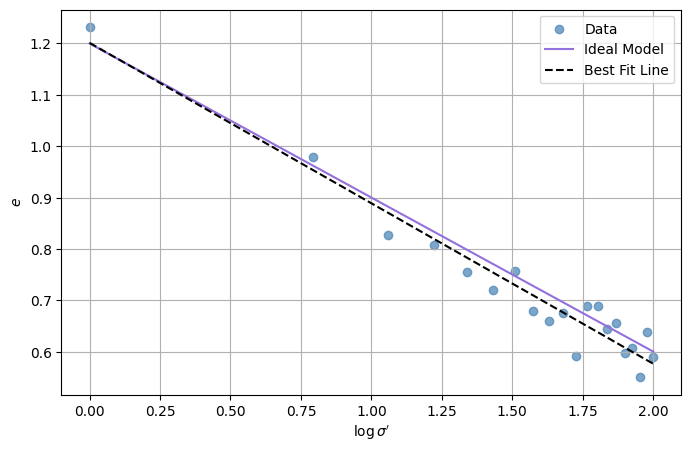

In [142]:
# plot the best fit line
plt.figure(figsize=(8, 5))
plt.scatter(np.log10(sigma_prime), e, label="Data", color="steelblue", alpha=0.7)
plt.plot(np.log10(sigma_prime), e0 - Cc * np.log10(sigma_prime), color='mediumpurple', label="Ideal Model")
plt.plot(np.log10(sigma_prime), X.dot(theta_best), 'k--', label="Best Fit Line")
plt.xlabel(r'$\log \sigma^\prime$')
plt.ylabel(r'$e$')
plt.legend()
plt.grid(True)

#### 1.b Gradient descent

There is another approach to fitting the data: using optimization algorithms.  Steepest gradient descent is one of those algorithms, and it is widely used in ML tasks. Theoretical background for gradient descent algortihms can be found in the lecture slides or the script.

Lets now try to find the the best fit line, using gradient descent. At first we need to define the function, which would compute the gradients of a loss function. Do it for following loss functions:

1. SSE
2. MSE
3. RMSE

In [144]:
def compute_gradient_SSE(theta):
    return 2*X.T@(X@theta - y)

def compute_gradient_MSE(theta):
    return (2 / len(X))*X.T@(X@theta - y)

def compute_gradient_RMSE(theta):
    rmse = np.sqrt(np.mean(X@theta - y)**2)
    if rmse == 0:
        return np.zeros_like(theta)
    return (1 / (len(X) * rmse)) * (X.T @ (X@theta - y))

The next steep is implementing the gradient descent loop and weight update. Compare the performance of different loss functions with different learning rates [0.1, 0.05, 0.01]. What do you observe? Which loss functions perform better with smaller/bigger learning rate?

In [143]:
theta = np.random.rand(2, 1)  # random initial guess
learning_rate = 0.1
n_iterations = 300

# Run Gradient Descent
for i in range(n_iterations):
    gradient = compute_gradient_MSE(theta)
    theta -= learning_rate * gradient

print(f'regression: e = {theta[0][0]:.2f} + {theta[1][0]:.2f} * log(sigma)')
print(f'ideal model: e = {e0:.2f} - {Cc:.2f} * log(sigma)')

regression: e = 1.18 + -0.30 * log(sigma)
ideal model: e = 1.20 - 0.30 * log(sigma)


Now lets visualize the fitted curve

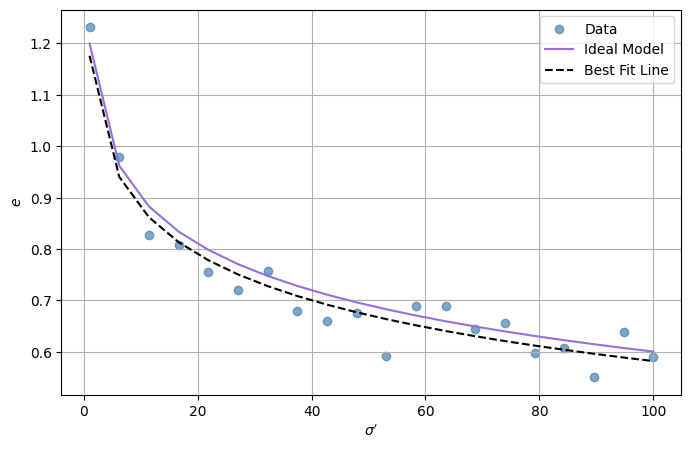

In [145]:
# plot the best fit line
plt.figure(figsize=(8, 5))
plt.scatter(sigma_prime, e, label="Data", color="steelblue", alpha=0.7)
plt.plot(sigma_prime, e0 - Cc * np.log10(sigma_prime), color='mediumpurple', label="Ideal Model")
plt.plot(sigma_prime, theta[1][0] * np.log10(sigma_prime) + theta[0][0], 'k--', label="Best Fit Line")
plt.xlabel(r'$\sigma^\prime$')
plt.ylabel(r'$e$')
plt.legend()
plt.grid(True)

## Task 2: Regression on real data

add theoretical background from geomechanics here

### Data extraction

Before training the ML model, it is important to analyze the data is it going to be used on. What are the labels and targets? What are the necessary conditions for the datasets to be used in machine learning algorithms?

Tip: explore the dimensions of the datasets. Do they represent a specific mathematical object used in ML algorithms? 

In [96]:
import pandas as pd
import numpy as np

df = pd.read_pickle('data.pkl') # read the data from a pickle file

We can see, that the columns SSA, q_i and r_d can be represented as a vectors with the shape (73,), so they can be converted into matrices.

In [97]:
SSA = df['SSA'].to_numpy()
q_i = df['q_i'].to_numpy()
r_d = df['r_d'].to_numpy()

The columns 'T' and 'SW' however represent a nested list, elements of which all have different lengths. This non-uniform behaviour of the dataset still allows for said datasets to be represented as a numpy array, however it is not yet a proper matrix.

In [98]:
# specifying dtype is necessary to turn nested list into a numpy array

temperature = np.array(df['T'], dtype=object)
sw = np.array(df['SW'], dtype=object)

### Data preprocessing

Data preprocessing is a crucial step for training an ML model. The real experimental data rarely has an ideal structure required for training, and it has to be manipulated in some way beforehand.

SSA, q_i and r_d are the clear features in the data. Temperature, however, is the feature as well, but the temperature array's dimensions are not yet compatible with the SSA, q_i and r_d arrays. Thus in order to obtain a proper feature matrix, the given arrays have to be expanded, flattened and combined. Since the targets sw are also represented as the nested list, they have to be manipulated as well.

Final feature and target matrices can be represented as follows:

$$\mathbf{X} = 
\begin{bmatrix}
SSA_1 & q_{i1} & r_{d1} & T_{11}\\
SSA_1 & q_{i1} & r_{d1} & T_{12}\\
\vdots & \vdots  & \vdots & \vdots\\
SSA_1 & q_{i1} & r_{d1} & T_{1n}\\
SSA_2 & q_{i2} & r_{d2} & T_{21}\\
SSA_2 & q_{i2} & r_{d2} & T_{22}\\
\vdots & \vdots  & \vdots & \vdots\\
SSA_2 & q_{i2} & r_{d2} & T_{2m}\\
\vdots & \vdots  & \vdots & \vdots\\
SSA_{73} & q_{i73} & r_{d73} & T_{73l}
\end{bmatrix} \quad

\mathbf{Y} = 
\begin{bmatrix}
sw_{11}\\
sw_{12}\\
\vdots\\
sw_{1n}\\
sw_{21}\\
sw_{22}\\
\vdots\\
sw_{2m}\\
\vdots\\
sw_{73l}\\
\end{bmatrix} \quad$$

Where $n$, $m$ and $l$ are the lengths of nested array element. How can we achieve this structure? How should we manipulate current data?

Step 1: expand the arrays SSA, q_i and r_d to match the lengths of the elements of the temperature array

In [114]:
expanded_SSA = [np.full(len(row), SSA[i]) for i, row in enumerate(temperature)]
expanded_q_i = [np.full(len(row), q_i[i]) for i, row in enumerate(temperature)]
expanded_r_d = [np.full(len(row), r_d[i]) for i, row in enumerate(temperature)]


Step 2: transform temperature array it into a column vector

In [115]:
temp_flat = np.concatenate(temperature)
temp_flat = temp_flat.reshape(-1, 1)

Step 3: combine SSA, q_i, r_d and temperature into feature matrice

In [116]:
X_combined = [np.stack([expanded_SSA[i], expanded_q_i[i], expanded_r_d[i]], axis=1)
                    for i in range(len(temperature))]
X_flat = np.concatenate(X_combined, axis=0)
X = np.concatenate([X_flat, temp_flat], axis=1)

Step 4: normalize the features

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # method for data normalization
norm_X = scaler.fit_transform(X)

Step 5: target array sw also has to be tranformed into a column vector and normalized.

In [118]:
sw_flat = np.concatenate(sw)
sw_flat = sw_flat.reshape(-1, 1)

norm_y = scaler.fit_transform(sw_flat)


### ML Training

Now that the data preprocessing is complete and both features and targets are normalized and presented in a matrix form, we can proceed with the training.

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, test_size=0.2, random_state=42)

degree = list(range(1, 11))
mse_scores = []

for i in range(len(degree)):
    model = make_pipeline(PolynomialFeatures(degree[i]), LinearRegression())
    model.fit(X_train,y_train)

    scores = cross_val_score(model, X_train, y_train,
                         scoring="neg_mean_squared_error",
                         cv=5)
    mse_scores.append(np.mean(-scores))

best_degree = np.argmin(mse_scores) + 1 # optimal degree

best_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


0.007034365017164083


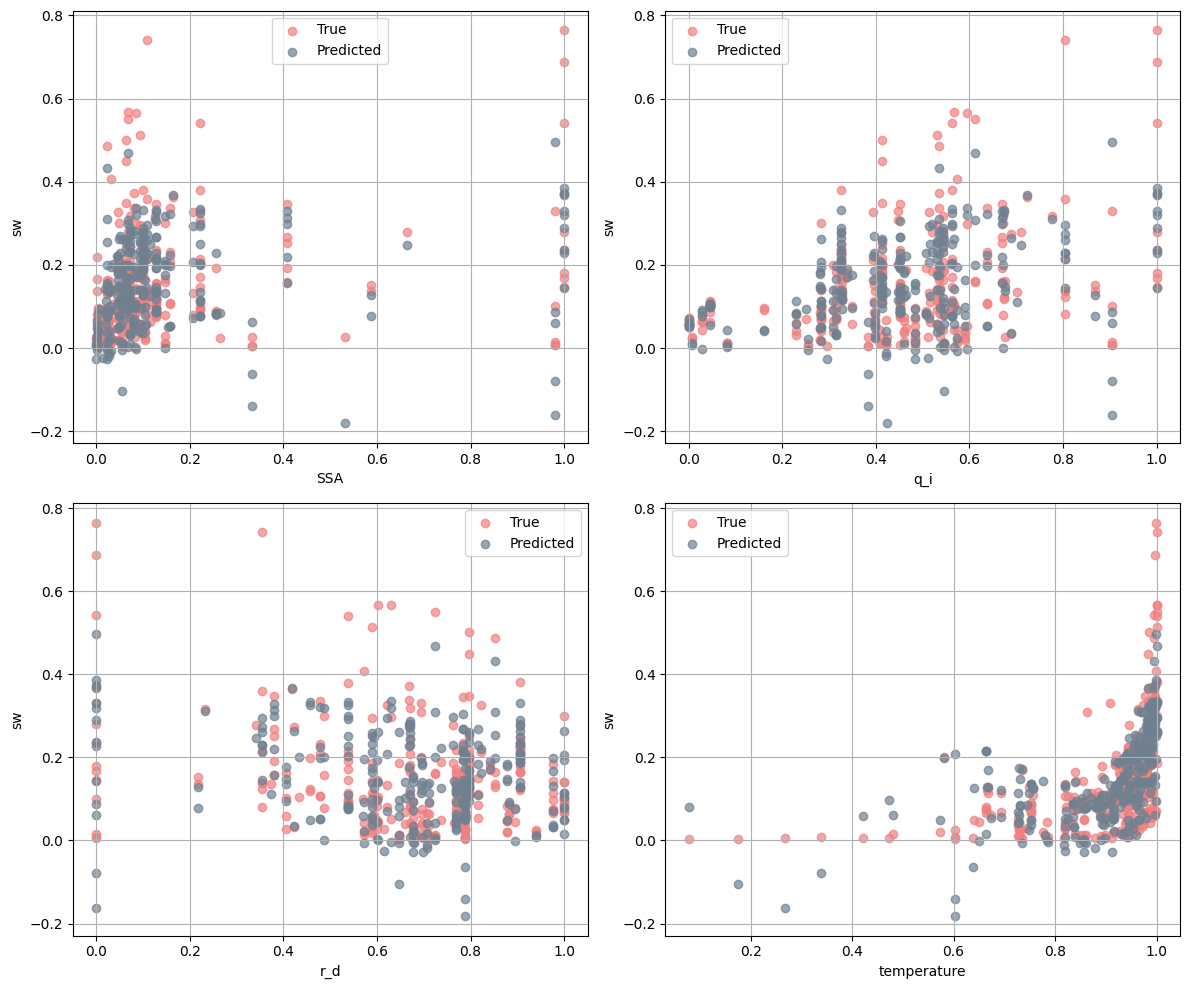

In [135]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
feature_names = ['SSA', 'q_i', 'r_d', 'temperature']

for i in range(4):
    ax = axs[i // 2, i % 2]
    ax.scatter(X_test[:, i], y_test, color='lightcoral', label='True', alpha=0.7)
    ax.scatter(X_test[:, i], y_pred, color='slategrey', label='Predicted', alpha=0.7)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('sw')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()
